In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Combining data of all the users into a single dataframe per sensor
datasets_path = os.path.join('datasets', 'hmog', 'public_dataset')

keystroke_all = []
acc_all = []
gyr_all = []
mag_all = []
touch_all = []
key_touch_counts_data = []

counts = pd.DataFrame(columns=["user", "session", "key_count", "touch_count"])
for user in os.listdir(datasets_path):
    for session in os.listdir(os.path.join(datasets_path, user)):
        if ("." not in session):
           
            keystroke = pd.read_csv(os.path.join(datasets_path, user, session, 'KeyPressEvent.csv'), header=None, usecols=[0, 3, 4, 5], names=["event_time", "press_type", "key_code", "orientation"])
            keystroke['user'] = user
            keystroke['session'] = session
            keystroke_all.append(keystroke)

            acc = pd.read_csv(os.path.join(datasets_path, user, session, 'Accelerometer.csv'), header=None, usecols=[0, 3, 4, 5, 6], names=["event_time", "x", "y", "z", "orientation"])
            acc['user'] = user
            acc['session'] = session
            acc_all.append(acc)

            gyr = pd.read_csv(os.path.join(datasets_path, user, session, 'Gyroscope.csv'), header=None, usecols=[0, 3, 4, 5, 6], names=["event_time", "x", "y", "z", "orientation"])
            gyr['user'] = user
            gyr['session'] = session
            gyr_all.append(gyr)

            mag = pd.read_csv(os.path.join(datasets_path, user, session, 'Magnetometer.csv'), header=None, usecols=[0, 3, 4, 5, 6], names=["event_time", "x", "y", "z", "orientation"])
            mag['user'] = user
            mag['session'] = session
            mag_all.append(mag)
            
            touch = pd.read_csv(os.path.join(datasets_path, user, session, 'TouchEvent.csv'), header=None, usecols=[0, 3, 4, 5, 6, 7, 8, 9, 10], names=["event_time", "pointer_count", "pointer_id", "action_id", "x", "y", "pressure","contact_size", "orientation"])
            touch['user'] = user
            touch['session'] = session
            touch_all.append(touch)

            key_touch_counts_data.append([user, session, keystroke.shape[0], touch.shape[0]])

            
            

keystroke_all = pd.concat(keystroke_all, ignore_index=True)
acc_all = pd.concat(acc_all, ignore_index=True)
gyr_all = pd.concat(gyr_all, ignore_index=True)
mag_all = pd.concat(mag_all, ignore_index=True)
touch_all = pd.concat(touch_all, ignore_index=True)

C:\Users\amit_\AppData\Local\Temp\ipykernel_14144\2413713321.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  acc_all = pd.concat(acc_all, ignore_index=True)


In [5]:
keystroke_all.shape, acc_all.shape, gyr_all.shape, mag_all.shape, touch_all.shape

((1630103, 6), (123425480, 7), (123677771, 7), (123681643, 7), (11336374, 11))

In [3]:
# Total count of keystroke, accelerometer and touch data, if only sessions with keystroke data is considered
keystroke_sessions = keystroke_all['session'].unique()

acc_with_keystroke = acc_all[acc_all['session'].isin(keystroke_sessions)]
gyr_with_keystroke = gyr_all[gyr_all['session'].isin(keystroke_sessions)]
mag_with_keystroke = mag_all[mag_all['session'].isin(keystroke_sessions)]
touch_with_keystroke = touch_all[touch_all['session'].isin(keystroke_sessions)]

# 55% reduction from entire dataset (acc, gyr, mag) touch reduced by 89%
keystroke_all.shape[0], acc_with_keystroke.shape[0], gyr_with_keystroke.shape[0], mag_with_keystroke.shape[0], touch_with_keystroke.shape[0]

(1630103, 55467324, 55584032, 55584510, 1138921)

In [10]:
# Number of data points in portrait mode.
keystroke_all[keystroke_all['orientation'] == 0].shape[0], acc_all[acc_all['orientation'] == 0].shape[0], gyr_all[gyr_all['orientation'] == 0].shape[0], mag_all[mag_all['orientation'] == 0].shape[0], touch_all[touch_all['orientation'] == 0].shape[0]


(1394567, 112571233, 112823580, 112827268, 10714208)

In [ ]:
# For sessions with keystroke data, number of data points in portrait mode.
# 14 to 15% reduction
acc_with_keystroke[acc_with_keystroke['orientation'] == 0].shape[0], gyr_with_keystroke[gyr_with_keystroke['orientation'] == 0].shape[0], mag_with_keystroke[mag_with_keystroke['orientation'] == 0].shape[0], touch_with_keystroke[touch_with_keystroke['orientation'] == 0].shape[0]

(47210458, 47325818, 47326248, 963212)

In [10]:
touch_all['action_id'].value_counts()

action_id
2.0    10280307
0.0      396980
1.0      396940
5.0      131064
6.0      131062
3.0          19
Name: count, dtype: int64

In [4]:
touch_all['contact_size'].unique(), touch_all['contact_size'].value_counts()

(array([0.02156863, 0.01960784, 0.01372549, 0.02352941, 0.01568627,
        0.01764706, 0.02745098, 0.0254902 , 0.03137255, 0.03333333,
        0.03529412, 0.0372549 , 0.03921569, 0.04117647, 0.04313726,
        0.02941177, 0.04509804, 0.04705883, 0.01176471, 0.04901961,
        0.0509804 , 0.05490196, 0.05294118, 0.05686275, 0.21176472,
        1.        , 0.06078432, 0.0627451 , 0.06470589, 0.        ,
               nan, 0.22941178, 0.06666667, 0.28235295, 0.06862745,
        0.05882353, 0.33529413]),
 contact_size
 0.023529    2613229
 0.025490    2087623
 0.021569    1925846
 0.027451    1427667
 0.029412     915947
 0.019608     879431
 0.031373     514110
 0.033333     275708
 0.017647     244955
 0.035294     156159
 0.037255      97098
 0.039216      63565
 0.041176      41375
 0.015686      39471
 0.043137      25288
 0.045098      13953
 0.047059       6663
 0.013725       3603
 0.049020       2656
 0.050980        989
 0.011765        354
 0.052941        346
 0.054902     

In [ ]:
pd.set_option('display.max_rows', None)
key_touch_counts = pd.DataFrame(key_touch_counts_data, columns=["user", "session", "keystroke_count", "touch_count"])

print("Average Touch Counts when Key Counts is present",key_touch_counts[key_touch_counts['keystroke_count'] != 0]['touch_count'].mean())
print("Average Touch Counts when Key Counts is not present",key_touch_counts[key_touch_counts['keystroke_count'] == 0]['touch_count'].mean())

# pd.set_option('display.max_rows', 60)


Average Touch Counts when Key Counts is present 1423.65125
Average Touch Counts when Key Counts is not present 6381.384856070088


In [13]:
# For all sessions which have keystroke data, Find which sensor starts the session
# Step 1: Get the first event_time per session for each sensor
# Ensure all event_time columns are datetime
acc_all['event_time'] = pd.to_datetime(acc_all['event_time'], errors='coerce')
gyr_all['event_time'] = pd.to_datetime(gyr_all['event_time'], errors='coerce')
mag_all['event_time'] = pd.to_datetime(mag_all['event_time'], errors='coerce')
touch_all['event_time'] = pd.to_datetime(touch_all['event_time'], errors='coerce')
keystroke_all['event_time'] = pd.to_datetime(keystroke_all['event_time'], errors='coerce')


acc_times = acc_all.groupby('session')['event_time'].first().rename('acc')
gyr_times = gyr_all.groupby('session')['event_time'].first().rename('gyr')
mag_times = mag_all.groupby('session')['event_time'].first().rename('mag')
touch_times = touch_all.groupby('session')['event_time'].first().rename('touch')
key_times = keystroke_all.groupby('session')['event_time'].first().rename('key')

# Step 2: Combine into one DataFrame (only for sessions in keystroke_all)
all_times = pd.concat([acc_times, gyr_times, mag_times, touch_times, key_times], axis=1)
all_times = all_times.loc[keystroke_all['session'].unique()]  # filter to only sessions with keystroke data

# Step 3: Find the column with the minimum value per row
min_sensors = all_times.idxmin(axis=1)

# Step 4: Count occurrences
min_times_count = min_sensors.value_counts().to_dict()


# Optional: Fill in 0s for missing sensors
for sensor in ['acc', 'gyr', 'mag', 'touch', 'key']:
    min_times_count.setdefault(sensor, 0)

print("Min times count")
print(min_times_count)
# Result - Sensor values are always the starting point (Primarily accelerometer)


Min times count
{'acc': 795, 'mag': 4, 'gyr': 1, 'touch': 0, 'key': 0}


In [14]:
# For all sessions which have keystroke data, Find which sensor ends the session
# Step 1: Get the first event_time per session for each sensor


acc_times = acc_all.groupby('session')['event_time'].last().rename('acc')
gyr_times = gyr_all.groupby('session')['event_time'].last().rename('gyr')
mag_times = mag_all.groupby('session')['event_time'].last().rename('mag')
touch_times = touch_all.groupby('session')['event_time'].last().rename('touch')
key_times = keystroke_all.groupby('session')['event_time'].last().rename('key')

# Step 2: Combine into one DataFrame (only for sessions in keystroke_all)
all_times = pd.concat([acc_times, gyr_times, mag_times, touch_times, key_times], axis=1)
all_times = all_times.loc[keystroke_all['session'].unique()]  # filter to only sessions with keystroke data

# Step 3: Find the column with the minimum value per row
max_sensors = all_times.idxmax(axis=1)

# Step 4: Count occurrences
max_times_count = max_sensors.value_counts().to_dict()


# Optional: Fill in 0s for missing sensors
for sensor in ['acc', 'gyr', 'mag', 'touch', 'key']:
    max_times_count.setdefault(sensor, 0)

print("Max times count")
print(max_times_count)
# Result - Sensor values are always the starting point (Primarily accelerometer)


Max times count
{'gyr': 716, 'acc': 76, 'touch': 8, 'mag': 0, 'key': 0}


#### Main

In [8]:
keystroke_all.shape, acc_all.shape, mag_all.shape, gyr_all.shape, touch_all.shape

((1630103, 5), (123425480, 6), (123681643, 6), (123677771, 6), (11336374, 10))

In [9]:
# Number of sessions for each sensor type
print("Num. of Keystroke Sessions",keystroke_all.groupby('user')['session'].nunique()[lambda x: x != 8]) # 8 sessions
# 24 for the rest
print("Num. of Acc Sessions",acc_all.groupby('user')['session'].nunique()[lambda x: x != 24])
print("Num. of Gyr Sessions",mag_all.groupby('user')['session'].nunique()[lambda x: x != 24])
print("Num. of Mag Sessions",gyr_all.groupby('user')['session'].nunique()[lambda x: x != 24])
print("Num. of Touch Sessions",touch_all.groupby('user')['session'].nunique()[lambda x: x != 24])

# User 733162 - Problematic: 6 missing accelerometer sessions (Remove this user), 526319 and 796581 have only 23 sessions in total


Num. of Keystroke Sessions Series([], Name: session, dtype: int64)
Num. of Acc Sessions user
526319    23
733162    18
796581    23
Name: session, dtype: int64
Num. of Gyr Sessions user
526319    23
796581    23
Name: session, dtype: int64
Num. of Mag Sessions user
526319    23
796581    23
Name: session, dtype: int64
Num. of Touch Sessions user
526319    23
796581    23
Name: session, dtype: int64


In [ ]:
# Dropping 733162 user
acc_all.drop(index=acc_all[acc_all["user"] == '733162'].index, inplace=True)
keystroke_all.drop(index=keystroke_all[keystroke_all["user"] == '733162'].index, inplace=True)
gyr_all.drop(index=gyr_all[gyr_all["user"] == '733162'].index, inplace=True)
mag_all.drop(index=mag_all[mag_all["user"] == '733162'].index, inplace=True)
touch_all.drop(index=touch_all[touch_all["user"] == '733162'].index, inplace=True)


keystroke_all.shape, acc_all.shape, mag_all.shape, gyr_all.shape, touch_all.shape

((1610951, 5), (122675220, 6), (122646404, 6), (122642552, 6), (11241384, 10))

In [9]:
keystroke_all.describe() # Top is most repeating, frequency is the count of most repeating


,event_time,press_type,key_code,user,session
count,1630103,1630103,1630103,1630103,1630103
unique,1626776,2,64,100,800
top,1400113960663,1,32,771782,771782_session_5
freq,3,911797,275263,27917,6293


In [10]:
keystroke_all.isna().sum()

event_time    0
press_type    0
key_code      0
user          0
session       0
dtype: int64

In [15]:
print("Num. of keycodes equal to 0: ", keystroke_all[keystroke_all['key_code'] == 0].count()['key_code'])


Num. of keycodes equal to 0:  0


In [32]:
print("Min. keycode", keystroke_all['key_code'].min())
print("Max. keycode",keystroke_all['key_code'].max())
print("Num. of keycodes less than 0: ", keystroke_all[keystroke_all['key_code'] < 0].count()['key_code'])

pd.set_option('display.max_rows', None)
print("Num. of sessions which have keycodes less than 0: ", 
      keystroke_all[keystroke_all['key_code'] < 0].groupby("session").count()["key_code"])
pd.reset_option('display.max_rows')

print("Num of unique sessions with keycodes less than 0: ", len(keystroke_all[keystroke_all['key_code'] < 0]["session"].unique()))

print("Num. of keycodes greater than 255: ", keystroke_all[keystroke_all['key_code'] > 255].count()['key_code'])


print("Unique press types", sorted(keystroke_all['press_type'].unique()))

Min. keycode -5
Max. keycode 8230
Num. of keycodes less than 0:  230758
Num. of sessions which have keycodes less than 0:  session
100669_session_18     126
100669_session_19     222
100669_session_2      190
100669_session_22     204
100669_session_24     259
100669_session_3      173
100669_session_8      103
100669_session_9      229
151985_session_15     162
151985_session_21     211
151985_session_24     219
151985_session_3      343
151985_session_4      413
151985_session_7      357
151985_session_8      162
151985_session_9      253
171538_session_10     243
171538_session_18     329
171538_session_2      420
171538_session_20     251
171538_session_21     317
171538_session_24     241
171538_session_3      239
171538_session_5      323
180679_session_1      143
180679_session_13     196
180679_session_16     109
180679_session_19     133
180679_session_2      107
180679_session_23     101
180679_session_4      215
180679_session_8       79
186676_session_1      593
186676_sess

In [35]:
keystroke_all[keystroke_all["key_code"] < 0]

,event_time,press_type,key_code,user,session
0,1396571743474,1,-1,100669,100669_session_18
1,1396571743698,0,-1,100669,100669_session_18
34,1396571757129,1,-1,100669,100669_session_18
35,1396571757357,0,-1,100669,100669_session_18
63,1396571775467,1,-1,100669,100669_session_18
...,...,...,...,...,...
1630090,1399160772721,1,-5,998757,998757_session_8
1630091,1399160772947,1,-5,998757,998757_session_8
1630092,1399160773089,0,-5,998757,998757_session_8
1630093,1399160773137,0,-5,998757,998757_session_8


In [38]:
# Dropping negative key codes
keystroke_all.drop(index=keystroke_all[keystroke_all["key_code"] < 0].index, inplace=True)
keystroke_all.reset_index(drop=True, inplace=True)
keystroke_all.shape

(1399345, 5)

In [39]:
keystroke_all[keystroke_all["key_code"] > 255]

,event_time,press_type,key_code,user,session
286072,1399504776487,1,8230,342329,342329_session_23
286073,1399504776689,0,8230,342329,342329_session_23
286074,1399504777092,1,8230,342329,342329_session_23
286075,1399504777256,0,8230,342329,342329_session_23


In [40]:
keystroke_all["key_code"].value_counts()

key_code
32      275263
101     131177
116     101800
111      88959
105      80565
97       71257
110      68996
114      66906
115      64336
108      58741
104      54362
46       44272
100      36382
117      33054
99       28385
121      25589
109      25265
112      24519
102      23441
119      21792
103      20367
98       15901
118      13693
107      11902
106       3178
120       2227
113       1553
10        1217
39         878
44         790
122        548
48         311
45         245
34         220
49         153
33         148
63         145
50         118
53          77
58          69
51          67
40          60
41          58
52          56
57          48
56          42
36          30
47          29
59          28
55          26
64          25
54          24
35          19
37          14
8230         4
43           4
38           4
180          2
61           2
42           2
Name: count, dtype: int64

In [41]:
keystroke_all[keystroke_all["key_code"] > 255]

,event_time,press_type,key_code,user,session
286072,1399504776487,1,8230,342329,342329_session_23
286073,1399504776689,0,8230,342329,342329_session_23
286074,1399504777092,1,8230,342329,342329_session_23
286075,1399504777256,0,8230,342329,342329_session_23


In [45]:
sorted(keystroke_all["key_code"].unique())[-3: -1]

[122, 180]

In [56]:
keystroke_all[keystroke_all["key_code"] == 180]

,event_time,press_type,key_code,user,session
441615,1400460764211,1,180,489146,489146_session_23
441616,1400460764417,0,180,489146,489146_session_23


In [52]:
keystroke_all[keystroke_all["key_code"] > 255].index

Index([], dtype='int64')

In [51]:
keystroke_all.index

RangeIndex(start=0, stop=1399341, step=1)

In [49]:
# Dropping over 255 keycodes
keystroke_all.drop(index=keystroke_all[keystroke_all["key_code"] > 255].index, inplace=True)
keystroke_all.reset_index(drop=True, inplace=True)
keystroke_all.shape

(1399341, 5)

In [63]:
sorted(keystroke_all["key_code"].unique())

[10,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 63,
 64,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 180]

In [17]:
# Checking keycode and press type pairs and event time increase
# 99 * 8 = 792 keystroke sessions
def check_keystroke_pattern(group):
    # Press type and keycode series
    press_type = group['press_type'].reset_index(drop=True)
    keycode = group['key_code'].reset_index(drop=True)
    event_time = group['event_time'].reset_index(drop=True)

    pairs = [] # To store all the pairs

    i = 0
    while i < len(group) - 1:
        # Check if consecutive rows have the same keycode
        if keycode[i] == keycode[i + 1]:
            pair = (press_type[i], press_type[i + 1]) 
            pairs.append(pair) # Append the press type pair
            i += 2  # Skip the next since it's part of the current pair
        else:
            i += 1  # Move to next row

    # Count pair frequencies
    pair_counts = pd.Series(pairs).value_counts() # Number of distinct press type pairs

    if not pair_counts.empty:
        # Most common pair
        most_common_pair = pair_counts.idxmax()
        if most_common_pair == (1, 0):
            guessed_pattern = "1-0 pattern"
        elif most_common_pair == (0, 1):
            guessed_pattern = "0-1 pattern"
        else:
            guessed_pattern = "Unknown"
    else:
        guessed_pattern = "Unknown"

    is_strict = all(pair == most_common_pair for pair in pairs) # Checking if all the pairs are equal to the most_common_pair

    # 2. Check for event_time correctness
    non_increasing_indexes = event_time.index[event_time.diff() < 0].tolist()
    is_event_time_increasing = len(non_increasing_indexes) == 0

    return pd.Series({
        'is_event_time_increasing': is_event_time_increasing,
        'non_increasing_indexes': non_increasing_indexes,
        'is_alternating': is_strict,
        'guessed_pattern': guessed_pattern,
        'total_pairs': len(pairs),
        'valid_pairs': pair_counts.get(most_common_pair, 0)
    })

# For each user, and each session
s = keystroke_all.groupby(['user', 'session'])[["user", "session", "key_code", "press_type", "event_time"]].apply(check_keystroke_pattern).reset_index()

print(f"# Sessions with errors:{s[s['is_alternating'] == False].count()['is_alternating']}")
print(f"Most Widely Used Pattern: {s["guessed_pattern"].value_counts()}")
print(f"% of Most Widely Used Pattern: {100 * s["valid_pairs"].sum() / s["total_pairs"].sum():.2f}%")
print(f"Incorrect event times : {s[s["is_event_time_increasing"] == False].count()["is_event_time_increasing"]}")


# Sessions with errors:792
Most Widely Used Pattern: guessed_pattern
1-0 pattern    792
Name: count, dtype: int64
% of Most Widely Used Pattern: 80.97%
Incorrect event times : 0


In [11]:
def keystrokes_per_time_window(group):
    # Ensure event_time is in timestamp format, if it's not
    group['event_time'] = pd.to_datetime(group['event_time'], unit='ms')

    # 1. Count keystrokes per second
    group['second'] = group['event_time'].dt.floor('s')  # Round down to the nearest second
    keystrokes_per_second = group.groupby(['second']).size()

    # 2. Count keystrokes per 10 seconds
    group['ten_second_interval'] = group['event_time'].dt.floor('10s')

    keystrokes_per_ten_seconds = group.groupby(['ten_second_interval']).size()

    # Combine the results (get the max count for keystrokes in a second or 10-second interval)
    results = pd.Series({
        'keystrokes_per_second': keystrokes_per_second.max() / 2 if not keystrokes_per_second.empty else 0,
        'keystrokes_per_ten_seconds': keystrokes_per_ten_seconds.max() / 2 if not keystrokes_per_ten_seconds.empty else 0,
    })
    return results

# Apply the function to the dataset, grouped by user and session
key_per_time_summary = keystroke_all.groupby(['user'])[['user', 'event_time']].apply(keystrokes_per_time_window).reset_index()

print("Average Key strokes per second", key_per_time_summary["keystrokes_per_second"].mean(), 
      "std", key_per_time_summary["keystrokes_per_second"].std(), 
      "max", key_per_time_summary["keystrokes_per_second"].max(),
      "min", key_per_time_summary["keystrokes_per_second"].min())

print("Number of keystrokes > 5", key_per_time_summary[key_per_time_summary["keystrokes_per_second"] > 5].count()["keystrokes_per_second"])
print("Number of keystrokes > 6", key_per_time_summary[key_per_time_summary["keystrokes_per_second"] > 6].count()["keystrokes_per_second"])
print("Number of keystrokes > 7", key_per_time_summary[key_per_time_summary["keystrokes_per_second"] > 7].count()["keystrokes_per_second"])

key_per_time_summary


Average Key strokes per second 5.04 std 0.8092895000860291 max 7.5 min 3.5
Number of keystrokes > 5 38
Number of keystrokes > 6 8
Number of keystrokes > 7 1


,user,keystrokes_per_second,keystrokes_per_ten_seconds
0,100669,4.5,21.0
1,151985,4.5,23.0
2,171538,5.0,32.0
3,180679,5.0,31.0
4,186676,6.0,30.5
...,...,...,...
95,980953,5.0,28.5
96,984799,5.5,35.0
97,986737,6.0,35.5
98,990622,6.5,33.0


In [16]:
sess_data = keystroke_all[keystroke_all["session"] == "100669_session_2"]
sess_data.reset_index(drop=True, inplace=True)
print(sess_data)

sess_data["event_time"] - sess_data["event_time"].shift()

         event_time press_type key_code    user           session
0     1396227050527          1      105  100669  100669_session_2
1     1396227050792          0      105  100669  100669_session_2
2     1396227055087          1       32  100669  100669_session_2
3     1396227055319          0       32  100669  100669_session_2
4     1396227057225          1       -5  100669  100669_session_2
...             ...        ...      ...     ...               ...
1689  1396228126741          0       32  100669  100669_session_2
1690  1396228128502          1       -5  100669  100669_session_2
1691  1396228128749          0       -5  100669  100669_session_2
1692  1396228129198          1       46  100669  100669_session_2
1693  1396228129458          0       46  100669  100669_session_2

[1694 rows x 5 columns]


0        NaN
1        265
2       4295
3        232
4       1906
        ... 
1689     254
1690    1761
1691     247
1692     449
1693     260
Name: event_time, Length: 1694, dtype: object

#### **Sensors**

In [19]:
acc_all.describe(), gyr_all.describe(), mag_all.describe()

(                  x             y             z
 count  1.226752e+08  1.226752e+08  1.226752e+08
 mean   1.764557e-01  4.662118e+00  7.653061e+00
 std    1.889848e+00  2.178167e+00  1.404493e+00
 min   -1.960911e+01 -1.960851e+01 -1.960851e+01
 25%   -6.715736e-01  3.596091e+00  6.893505e+00
 50%   -7.182605e-03  4.907515e+00  7.793725e+00
 75%    6.739678e-01  6.147711e+00  8.587403e+00
 max    1.960791e+01  1.960851e+01  1.960851e+01,
          event_time             x             y             z
 count  1.226426e+08  1.226426e+08  1.226426e+08  1.226426e+08
 mean   1.399211e+12  1.067254e-02  9.825188e-03  7.488709e-03
 std    1.815469e+09  2.002882e-01  2.374091e-01  2.245665e-01
 min    1.396222e+12 -1.000842e+01 -1.000842e+01 -1.000842e+01
 25%    1.397693e+12 -5.484507e-02 -6.811147e-02 -5.833763e-02
 50%    1.399333e+12  9.468411e-03  2.138028e-03 -1.252274e-02
 75%    1.400804e+12  7.487083e-02  8.124508e-02  5.070182e-02
 max    1.402767e+12  9.942443e+00  1.004660e+01  9.97

In [20]:
acc_all.isna().sum(), gyr_all.isna().sum(), mag_all.isna().sum()

(event_time    0
 x             0
 y             0
 z             0
 user          0
 session       0
 dtype: int64,
 event_time    0
 x             0
 y             0
 z             0
 user          0
 session       0
 dtype: int64,
 event_time    0
 x             0
 y             0
 z             0
 user          0
 session       0
 dtype: int64)

In [21]:
print("Range of Accelerometer Values")
print(f"x: {acc_all["x"].min()} to {acc_all["x"].max()}")
print(f"y: {acc_all["y"].min()} to {acc_all["y"].max()}")
print(f"z: {acc_all["z"].min()} to {acc_all["z"].max()}")
print("--")
print("Range of Gyroscope Values")
print(f"x: {gyr_all["x"].min()} to {gyr_all["x"].max()}")
print(f"y: {gyr_all["y"].min()} to {gyr_all["y"].max()}")
print(f"z: {gyr_all["z"].min()} to {gyr_all["z"].max()}")
print("--")
print("Range of Magnetometer Values")
print(f"x: {mag_all["x"].min()} to {mag_all["x"].max()}")
print(f"y: {mag_all["y"].min()} to {mag_all["y"].max()}")
print(f"z: {mag_all["z"].min()} to {mag_all["z"].max()}")


Range of Accelerometer Values
x: -19.60911 to 19.607914
y: -19.608511 to 19.608511
z: -19.608511 to 19.608511
--
Range of Gyroscope Values
x: -10.008416 to 9.942443
y: -10.008416 to 10.046596
z: -10.008416 to 9.978484
--
Range of Magnetometer Values
x: -418.536 to 208.627
y: -134.574 to 510.128
z: -1295.301 to 504.478


In [22]:
## Sampling rate of sensors

def calc_sampling_rate(group):
    group['time_diff'] = group['event_time'].diff()
    mean_in_ms = group["time_diff"].mean()
    mean_in_s = mean_in_ms / 1000
    return pd.Series({
        'mean_in_ms': mean_in_ms,
        'mean_in_s': mean_in_s,
        'sampling_rate': f"{(1/mean_in_s):.2f} Hz"
    })



a = acc_all.groupby(["user", "session"])[["user", "session", "event_time"]].apply(calc_sampling_rate)
m = mag_all.groupby(["user", "session"])[["user", "session", "event_time"]].apply(calc_sampling_rate)
g = gyr_all.groupby(["user", "session"])[["user", "session", "event_time"]].apply(calc_sampling_rate)

print(f"Average Sampling Rate (Acc.):  {1/(a["mean_in_s"].mean())}")
print(f"Average Sampling Rate (Mag.):  {1/(m["mean_in_s"].mean())}")
print(f"Average Sampling Rate (Gyr.):  {1/(g["mean_in_s"].mean())}")




Average Sampling Rate (Acc.):  99.40576691984754
Average Sampling Rate (Mag.):  99.3668316966325
Average Sampling Rate (Gyr.):  99.36278508720946


In [23]:
def check_sensor_event_times(group):
    
    event_time = group['event_time'].reset_index(drop=True)

    non_increasing_indexes = event_time.index[event_time.diff() < 0].tolist()
    is_event_time_increasing = len(non_increasing_indexes) == 0

    return pd.Series({
        'is_event_time_increasing': is_event_time_increasing,
        'non_increasing_indexes': non_increasing_indexes
    })

# For each user, and each session
acc_inc = acc_all.groupby(['user', 'session'])[["user", "session", "event_time"]].apply(check_sensor_event_times).reset_index()
gyr_inc = gyr_all.groupby(['user', 'session'])[["user", "session", "event_time"]].apply(check_sensor_event_times).reset_index()
mag_inc = mag_all.groupby(['user', 'session'])[["user", "session", "event_time"]].apply(check_sensor_event_times).reset_index()


print(f"Accelerometer Incorrect event times : {acc_inc[acc_inc["is_event_time_increasing"] == False].count()["is_event_time_increasing"]}")
print(f"Gyroscope Incorrect event times : {gyr_inc[gyr_inc["is_event_time_increasing"] == False].count()["is_event_time_increasing"]}")
print(f"Magnetometer Incorrect event times : {mag_inc[mag_inc["is_event_time_increasing"] == False].count()["is_event_time_increasing"]}")



Accelerometer Incorrect event times : 0
Gyroscope Incorrect event times : 0
Magnetometer Incorrect event times : 0


#### **Touch**

In [25]:
touch_all.shape

(11336374, 11)

In [26]:
touch_all.describe()

,pointer_count,pointer_id,action_id,x,y,pressure,contact_size,orientation
count,1.133637e+07,1.133637e+07,1.133637e+07,1.133637e+07,1.133637e+07,11336372.0,1.133637e+07,1.133637e+07
mean,1.425943e+00,2.230538e-01,1.975879e+00,6.347744e+02,9.177262e+02,1.0,2.518577e-02,9.829318e-02
std,5.019776e-01,4.215031e-01,6.808371e-01,2.703449e+02,3.908944e+02,0.0,4.397782e-03,4.678299e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710000e+02,1.0,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,2.000000e+00,4.634748e+02,6.191636e+02,1.0,2.156863e-02,0.000000e+00
50%,1.000000e+00,0.000000e+00,2.000000e+00,6.514212e+02,9.963395e+02,1.0,2.352941e-02,0.000000e+00
75%,2.000000e+00,0.000000e+00,2.000000e+00,7.911345e+02,1.223852e+03,1.0,2.745098e-02,0.000000e+00
max,4.000000e+00,3.000000e+00,6.000000e+00,1.903500e+03,1.924500e+03,1.0,1.000000e+00,3.000000e+00


In [27]:
touch_all[touch_all["pressure"] != 1]

,event_time,pointer_count,pointer_id,action_id,x,y,pressure,contact_size,orientation,user,session
4287479,1396307092717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538363,538363_session_5
7260576,1397090398520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751131,751131_session_7


In [28]:
touch_all.dtypes

event_time        object
pointer_count    float64
pointer_id       float64
action_id        float64
x                float64
y                float64
pressure         float64
contact_size     float64
orientation      float64
user              object
session           object
dtype: object

In [29]:
print("Range of Touch Values")
print(f"x: {touch_all["x"].min()} to {touch_all["x"].max()}")
print(f"y: {touch_all["y"].min()} to {touch_all["y"].max()}")

print("Number of Negative values: y axis: ", touch_all[touch_all["y"] < 0].count()["y"])


Range of Touch Values
x: 0.0 to 1903.5
y: -271.0 to 1924.5
Number of Negative values: y axis:  7652


In [32]:
def check_touch_event_times(group):
    
    event_time = group['event_time'].reset_index(drop=True)

    non_increasing_indexes = event_time.index[event_time.diff() < 0].tolist()
    is_event_time_increasing = len(non_increasing_indexes) == 0

    return pd.Series({
        'is_event_time_increasing': is_event_time_increasing,
        'non_increasing_indexes': non_increasing_indexes
    })

# For each user, and each session
touch_inc = touch_all.groupby(['user', 'session'])[["user", "session", "event_time"]].apply(check_touch_event_times).reset_index()


print(f"Touch Incorrect event times : {touch_inc[touch_inc["is_event_time_increasing"] == False].count()["is_event_time_increasing"]}")

print(touch_inc[touch_inc["is_event_time_increasing"] == False])


Touch Incorrect event times : 1
       user           session  is_event_time_increasing non_increasing_indexes
850  527796  527796_session_2                     False                 [7107]


In [33]:
incorrect_sess = touch_all[touch_all["session"] == "527796_session_2"].copy().reset_index(drop=True)
incorrect_sess[incorrect_sess["event_time"].diff() < 0].index

Index([7107], dtype='int64')

In [31]:
touch_all["event_time"] = pd.to_numeric(touch_all["event_time"], errors="coerce") # Converting event time to numeric

In [34]:
touch_all[touch_all["event_time"].isna()]
touch_all["event_time"].dtype

dtype('float64')

In [35]:
touch_all.dtypes

event_time       float64
pointer_count    float64
pointer_id       float64
action_id        float64
x                float64
y                float64
pressure         float64
contact_size     float64
orientation      float64
user              object
session           object
dtype: object

In [36]:
touch_all.isna().sum()

event_time       0
pointer_count    2
pointer_id       2
action_id        2
x                2
y                2
pressure         2
contact_size     2
orientation      2
user             0
session          0
dtype: int64

In [37]:
# Rows with isna values
touch_all[touch_all.isna().any(axis=1)]

,event_time,pointer_count,pointer_id,action_id,x,y,pressure,contact_size,orientation,user,session
4287479,1.396307e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538363,538363_session_5
7260576,1.397090e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751131,751131_session_7


In [38]:
# Drop isna rows
touch_all.dropna(inplace=True, ignore_index=True)

In [39]:
touch_all.iloc[7260574:7260580]

,event_time,pointer_count,pointer_id,action_id,x,y,pressure,contact_size,orientation,user,session
7260574,1.397090e+12,1.0,0.0,2.0,867.0,122.0,1.0,0.021569,1.0,751131,751131_session_7
7260575,1.397090e+12,1.0,0.0,0.0,86.0,411.0,1.0,0.023529,0.0,751131,751131_session_7
7260576,1.397090e+12,1.0,0.0,2.0,86.0,411.0,1.0,0.023529,0.0,751131,751131_session_7
7260577,1.397090e+12,1.0,0.0,1.0,86.0,411.0,1.0,0.023529,0.0,751131,751131_session_7
7260578,1.397090e+12,1.0,0.0,0.0,817.0,99.0,1.0,0.021569,0.0,751131,751131_session_7
7260579,1.397090e+12,1.0,0.0,2.0,817.0,99.0,1.0,0.021569,0.0,751131,751131_session_7


In [40]:
touch_all.shape

(11336372, 11)

In [41]:
touch_all.isna().sum()

event_time       0
pointer_count    0
pointer_id       0
action_id        0
x                0
y                0
pressure         0
contact_size     0
orientation      0
user             0
session          0
dtype: int64

In [42]:
# Incorrect timestamps
touch_all["event_time"].sort_values(ascending=False).head(26)

4080147    1.396566e+25
7637269    1.396225e+25
973679     1.397346e+24
7095848    1.396224e+24
4183069    1.396223e+24
6585004    1.397693e+23
4256063    1.396567e+23
1003471    1.397690e+21
6306866    1.397003e+20
5515365    1.397002e+20
4200430    1.396395e+20
8351705    1.396224e+20
6981301    1.396394e+19
4192057    1.396391e+18
8244100    1.397014e+17
6645232    1.397014e+17
955979     1.397140e+16
5649402    1.397140e+16
1029297    1.397140e+16
6645231    1.397140e+16
5515364    1.397140e+16
4183068    1.396140e+16
955978     1.313973e+14
5598636    1.139830e+13
5560068    1.139770e+13
4929987    1.402767e+12
Name: event_time, dtype: float64

In [43]:
# Another way of identifying incorrect indices
touch_all[touch_all["event_time"] > 1402767052230.0]["event_time"].sort_index().index ==  touch_all["event_time"].sort_values(ascending=False).head(25).sort_index().index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [44]:
# Incorrect timestamps index
indices_with_incorrect_timestamps = touch_all["event_time"].sort_values(ascending=False).head(25).sort_index().index

# This shows that the incorrect timestamp rows are either the last or the last 2 rows of the session
for ix in indices_with_incorrect_timestamps:
    print("----------------------------------")
    current_session = touch_all.at[ix, "session"]
    next_row_session = touch_all.at[ix + 1, "session"]
    print(touch_all.loc[ix].name, current_session)
    
    print("Next Row: ", "Index: ",touch_all.loc[ix+1].name, "Session: ",next_row_session)

    print("isLastRow", current_session != next_row_session)
    

----------------------------------
955978 220962_session_15
Next Row:  Index:  955979 Session:  220962_session_15
isLastRow False
----------------------------------
955979 220962_session_15
Next Row:  Index:  955980 Session:  220962_session_16
isLastRow True
----------------------------------
973679 220962_session_18
Next Row:  Index:  973680 Session:  220962_session_19
isLastRow True
----------------------------------
1003471 220962_session_23
Next Row:  Index:  1003472 Session:  220962_session_24
isLastRow True
----------------------------------
1029297 220962_session_6
Next Row:  Index:  1029298 Session:  220962_session_7
isLastRow True
----------------------------------
4080147 527796_session_17
Next Row:  Index:  4080148 Session:  527796_session_18
isLastRow True
----------------------------------
4183068 538363_session_1
Next Row:  Index:  4183069 Session:  538363_session_1
isLastRow False
----------------------------------
4183069 538363_session_1
Next Row:  Index:  4183070 Sess

In [45]:
## Removing incorrect timestamps
touch_all.drop(index=indices_with_incorrect_timestamps, inplace=True)
touch_all.reset_index(drop=True, inplace=True)

In [46]:
touch_all.shape

(11336347, 11)

In [47]:
def touch_events_per_second(group):
    # Ensure event_time is in timestamp format, if it's not
    group['event_time'] = pd.to_datetime(group['event_time'], unit='ms')

    # Count events per second
    group['second'] = group['event_time'].dt.floor('10ms')  # Round down to the nearest second
    events_per_second = group.groupby(['second']).size()

    results = pd.Series({
        'events_per_second': events_per_second.max() if not events_per_second.empty else 0
    })
    return results

t = touch_all.groupby(["user", "session"])[["user", "session", "event_time"]].apply(touch_events_per_second)

print("Average events_per_second", t["events_per_second"].mean(), "std.", t["events_per_second"].std())
print("Min events", t["events_per_second"].min(), "Max", t["events_per_second"].max())


Average events_per_second 3.9437030859049207 std. 1.8770510869164172
Min events 2 Max 12


In [48]:
touch_all.describe()

,event_time,pointer_count,pointer_id,action_id,x,y,pressure,contact_size,orientation
count,1.133635e+07,1.133635e+07,1.133635e+07,1.133635e+07,1.133635e+07,1.133635e+07,11336347.0,1.133635e+07,1.133635e+07
mean,1.398992e+12,1.425944e+00,2.230543e-01,1.975884e+00,6.347743e+02,9.177274e+02,1.0,2.518577e-02,9.829251e-02
std,1.901843e+09,5.019778e-01,4.215034e-01,6.808315e-01,2.703444e+02,3.908940e+02,0.0,4.397785e-03,4.678291e-01
min,1.396222e+12,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.710000e+02,1.0,0.000000e+00,0.000000e+00
25%,1.397172e+12,1.000000e+00,0.000000e+00,2.000000e+00,4.634753e+02,6.191670e+02,1.0,2.156863e-02,0.000000e+00
50%,1.398729e+12,1.000000e+00,0.000000e+00,2.000000e+00,6.514212e+02,9.963414e+02,1.0,2.352941e-02,0.000000e+00
75%,1.400716e+12,2.000000e+00,0.000000e+00,2.000000e+00,7.911344e+02,1.223852e+03,1.0,2.745098e-02,0.000000e+00
max,1.402767e+12,4.000000e+00,3.000000e+00,6.000000e+00,1.903500e+03,1.924500e+03,1.0,1.000000e+00,3.000000e+00


In [49]:
touch_all[touch_all["x"]> 1903].count()["x"] , touch_all[touch_all["y"]> 1920].count()["y"] 

(np.int64(3), np.int64(1))

In [50]:
touch_all["orientation"].value_counts()

zero =touch_all[touch_all["orientation"] == 0]
print("Zero orientation: x", zero["x"].min(), "-", zero["x"].max())
print("Zero orientation: y", zero["y"].min(), "-", zero["y"].max())
print("--")

one =touch_all[touch_all["orientation"] == 1]
print("One orientation: x", one["x"].min(), "-", one["x"].max())
print("One orientation: y", one["y"].min(), "-", one["y"].max())
print("--")

three = touch_all[touch_all["orientation"] == 3]
print("Three orientation: x", three["x"].min(), "-", three["x"].max())
print("Three orientation: y", three["x"].min(), "-", three["y"].max())
print("--")


Zero orientation: x 0.0 - 1814.5
Zero orientation: y -271.0 - 1924.5
--
One orientation: x 0.0 - 1903.5
One orientation: y -120.0 - 1867.0
--
Three orientation: x 17.0 - 1902.0
Three orientation: y 17.0 - 1866.0
--


Text(0, 0.5, 'Count')

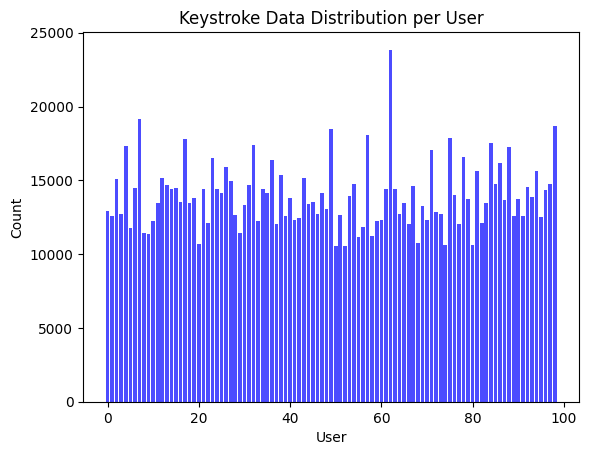

In [57]:
## Keystroke data per user

temp = keystroke_all.groupby("user").count()["event_time"]
temp.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots()
ax.bar(temp.index, temp.values,color='blue', alpha=0.7)
ax.set_title('Keystroke Data Distribution per User')
ax.set_xlabel("User")
ax.set_ylabel("Count")

Average number of data points 1239143.6363636365 std 339960.4456607957 min 581995 max 2320520


Text(0, 0.5, 'Count')

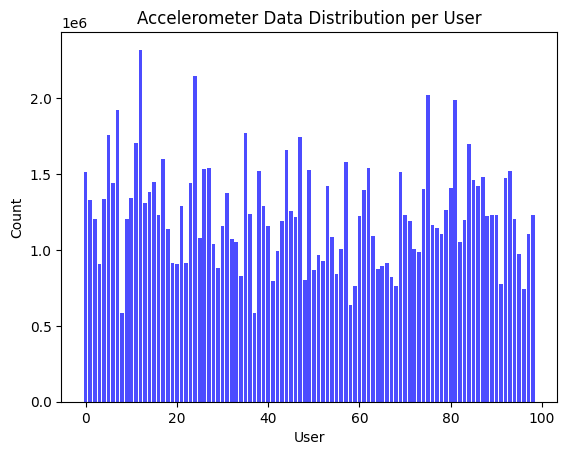

In [59]:
## Accelerometer data per user

temp = acc_all.groupby("user").count()["event_time"]
temp.reset_index(drop=True, inplace=True)
print("Average number of data points", temp.mean(), "std", temp.std(), "min", temp.min(), "max", temp.max())

fig, ax = plt.subplots()
ax.bar(temp.index, temp.values,color='blue', alpha=0.7)
ax.set_title('Accelerometer Data Distribution per User')
ax.set_xlabel("User")
ax.set_ylabel("Count")

C:\Users\amit_\AppData\Local\Temp\ipykernel_21976\2087990064.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["magnitude"] = np.sqrt(df_selected["x"]**2 + df_selected["y"]**2 + df_selected["z"]**2)
C:\Users\amit_\AppData\Local\Temp\ipykernel_21976\2087990064.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_downsampled = df_selected.groupby("user").apply(lambda x: x.iloc[::100]).reset_index(drop=True)
C:\Users\amit_\AppData\Local\Temp\i

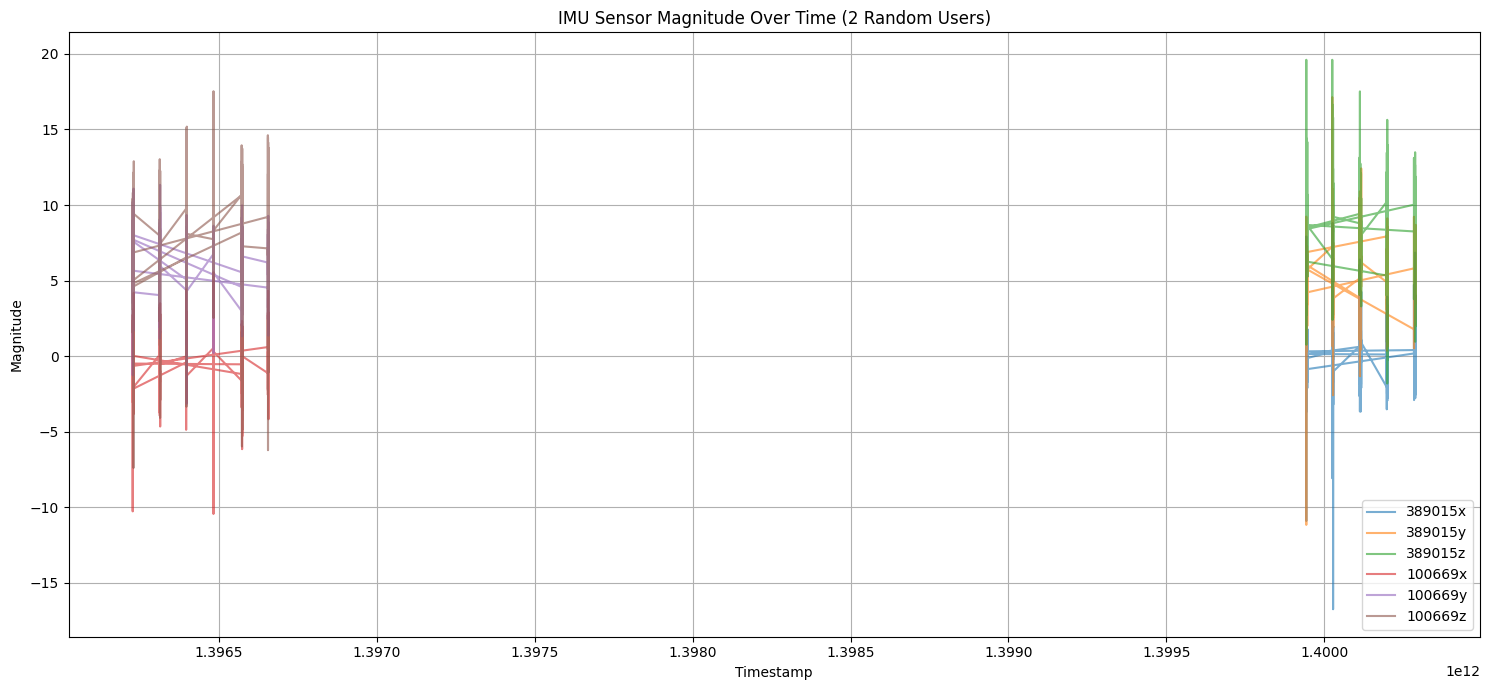

In [67]:
# Select two random users
import random

selected_users = random.sample(list(acc_all["user"].unique()), 2)
df_selected = acc_all[acc_all["user"].isin(selected_users)]

# Compute magnitude of IMU signal
df_selected["magnitude"] = np.sqrt(df_selected["x"]**2 + df_selected["y"]**2 + df_selected["z"]**2)

# Downsample for visualization, taking every 100th row
df_downsampled = df_selected.groupby("user").apply(lambda x: x.iloc[::100]).reset_index(drop=True)

# Plot
plt.figure(figsize=(15, 7))
for user in selected_users:
    user_data = df_selected[df_selected["user"] == user]
    plt.plot(user_data["event_time"], user_data["x"], label=f"{user}x", alpha=0.6)
    plt.plot(user_data["event_time"], user_data["y"], label=f"{user}y", alpha=0.6)
    plt.plot(user_data["event_time"], user_data["z"], label=f"{user}z", alpha=0.6)
    # user_data = df_downsampled[df_downsampled["user"] == user]
    # plt.plot(user_data["event_time"], user_data["magnitude"], label=user, alpha=0.6)


plt.title("IMU Sensor Magnitude Over Time (2 Random Users)")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

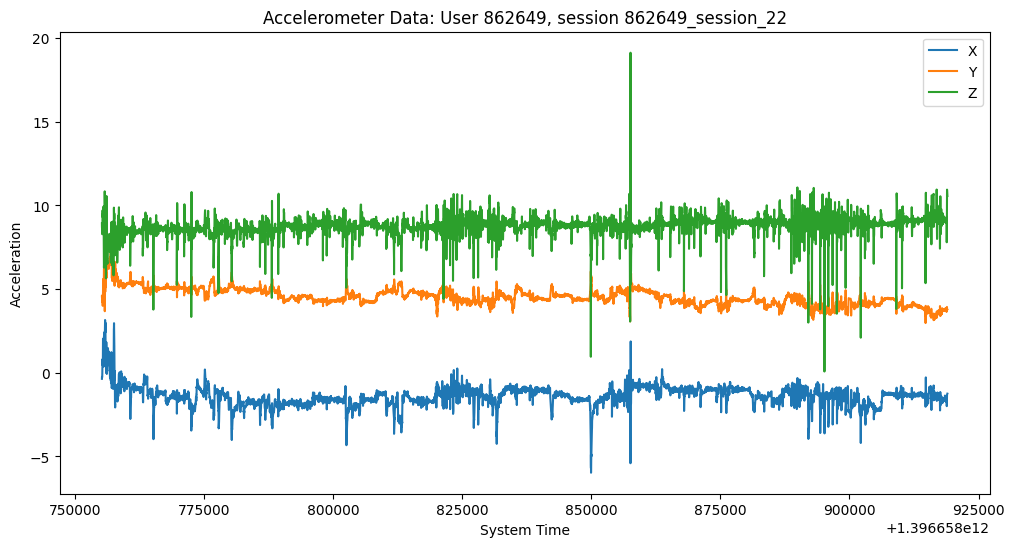

In [69]:

random_user = np.random.choice(acc_all["user"])
filtered_user = acc_all[acc_all["user"] == random_user]
random_session = np.random.choice(filtered_user["session"])

temp_acc = filtered_user[filtered_user["session"] == random_session]



fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(temp_acc['event_time'], temp_acc['x'], label='X')
ax.plot(temp_acc['event_time'], temp_acc['y'], label='Y')
ax.plot(temp_acc['event_time'], temp_acc['z'], label='Z')
ax.set_xlabel('System Time')
ax.set_ylabel('Acceleration')
ax.set_title(f'Accelerometer Data: User {random_user}, session {random_session}')
ax.legend()

### Miscellaneous

In [48]:
# Combines press and release key events into one row.
def shrink_key_pairs(df):
    length = df.shape[0]

    drop_indices = []
    i = 0
    # Going through the rows
    while(i < length):
        # Getting the release time from the next row
        next_key_event_time = df.iloc[i + 1]["event_time"]
        # Adding it to the current row
        df.at[i, 'release_time'] = next_key_event_time
        # Adding the next rows index to drop_indices list
        drop_indices.append(i + 1)

        i = i + 2

    # Dropping the rows
    df.drop(df.index[drop_indices], inplace=True)
    # Renaming event_time to press_time
    df.rename(columns = {'event_time':'press_time'}, inplace = True)
    # Deleting press_type column and reset index
    del df["press_type"]
    df.reset_index(inplace = True, drop = True)

# Setting: 1 to be pressed and 0 to be released
def check_pair_order(df, index):
    # If the key is released
    if (df.at[index, "press_type"] == 0):
        # If the next keys timestamp is greater than current keys timestamp
        if (df.at[index, "event_time"] < df.at[index + 1, "event_time"]):
            # swap press type
            df.at[index, "press_type"] = 1
            df.at[index + 1, "press_type"] = 0
        # If next keys timestamp is less than current keys timestamp
        else:
            # Swap rows to correct the ordering
            temp = df.loc[index]
            df.loc[index] = df.loc[index + 1]
            df.loc[index + 1] = temp
    # If the key is pressed 
    else:
        # if the keys timestamp is greater than the next keys timestamp
        if (df.at[index, "event_time"] > df.at[index + 1, "event_time"]):
            # swap rows and press types to correct ordering
            df.at[index, "press_type"] = 0
            df.at[index + 1, "press_type"] = 1
            temp = df.loc[index]
            df.loc[index] = df.loc[index + 1]
            df.loc[index + 1] = temp

def clean_keystroke_data(key_csv: pd.DataFrame):
    # Removing keystrokes where keycode is less than 0 or greater than 255
    key_csv.drop(index=key_csv[key_csv["key_code"] < 0].index, inplace=True)
    key_csv.drop(index=key_csv[key_csv["key_code"] > 255].index, inplace=True)

    # Resetting the index after dropping
    key_csv.reset_index(drop=True, inplace=True)

    assert key_csv[key_csv["key_code"] < 0].shape[0] == 0, "Keycodes still Include Negative Values"
    assert key_csv[key_csv["key_code"] > 255].shape[0] == 0, "Keycodes still Include > 255 Values"

    length = key_csv.shape[0]
    index=0

    while(index < length):
        # If its the last row (Odd number of rows)
        if (index == length-1):
            # Add a new row with the opposite press type as the current row
            key_csv.loc[index + 0.5] = [key_csv.at[index, "event_time"], 1 - int(key_csv.at[index, "press_type"]), key_csv.at[index, "key_code"]]
            key_csv = key_csv.sort_index().reset_index(drop=True)
            check_pair_order(key_csv, index)
            break
        else:
            # If the keycodes are different or if the press types are the same
            if ((key_csv.at[index, "key_code"] != key_csv.at[index + 1, "key_code"]) or (key_csv.at[index, "press_type"] == key_csv.at[index + 1, "press_type"])):
                # Add a new row with the opposite press type
                key_csv.loc[index + 0.5] = [key_csv.at[index, "event_time"], 1 - int(key_csv.at[index, "press_type"]), key_csv.at[index, "key_code"]]
                key_csv = key_csv.sort_index().reset_index(drop=True)
                length = key_csv.shape[0]
            check_pair_order(key_csv, index)
            index = index + 2

    assert key_csv.shape[0] % 2 == 0, "Keystroke data doesn't have equal pairs"

    shrink_key_pairs(key_csv)


In [ ]:
key_session = keystroke_all[keystroke_all["session"] == "100669_session_2"]
acc_session = acc_all[acc_all["session"] == "100669_session_2"]
gyr_session = gyr_all[gyr_all["session"] == "100669_session_2"]
mag_session = mag_all[mag_all["session"] == "100669_session_2"]
touch_session = touch_all[touch_all["session"] == "100669_session_2"]


key_session.drop(columns=["user", "session"], inplace=True)
acc_session.drop(columns=["user", "session"], inplace=True)
gyr_session.drop(columns=["user", "session"], inplace=True)
mag_session.drop(columns=["user", "session"], inplace=True)
touch_session.drop(columns=["user", "session", "action_id", "pointer_count", "pointer_id"], inplace=True)


key_session.reset_index(drop=True, inplace=True)
acc_session.reset_index(drop=True, inplace=True)
gyr_session.reset_index(drop=True, inplace=True)
mag_session.reset_index(drop=True, inplace=True)
touch_session.reset_index(drop=True, inplace=True)

print("Key Session Before Cleaning", key_session.head())

clean_keystroke_data(key_session)

print("Heads")
print(key_session.iloc[0]["event_time"], key_session.iloc[-1]["event_time"])
print(acc_session.iloc[0]["event_time"], acc_session.iloc[-1]["event_time"])
print(gyr_session.iloc[0]["event_time"], gyr_session.iloc[-1]["event_time"])
print(mag_session.iloc[0]["event_time"], mag_session.iloc[-1]["event_time"])
print(touch_session.iloc[0]["event_time"], touch_session.iloc[-1]["event_time"])


session_start_time = min(key_session.at[0, "event_time"], acc_session.at[0, "event_time"], gyr_session.at[0, "event_time"], mag_session.at[0, "event_time"], touch_session.at[0, "event_time"])
session_end_time = max(key_session.iloc[-1]["event_time"], acc_session.iloc[-1]["event_time"], gyr_session.iloc[-1]["event_time"], mag_session.iloc[-1]["event_time"], touch_session.iloc[-1]["event_time"])

print("Min", session_start_time),
print("Max", session_end_time)
time_window = 1
time_window_in_ms = time_window * 1000
seq_length = 10

window_start_time = session_start_time
while window_start_time <= session_end_time:
    window_end_time = window_start_time + time_window_in_ms
    relevant_key_data = key_session[(key_session["event_time"] >= window_start_time) & (key_session["event_time"] <= window_end_time)]
    relevant_acc_data = acc_session[(acc_session["event_time"] >= window_start_time) & (acc_session["event_time"] <= window_end_time)]
    relevant_gyr_data = gyr_session[(gyr_session["event_time"] >= window_start_time) & (gyr_session["event_time"] <= window_end_time)]
    relevant_mag_data = mag_session[(mag_session["event_time"] >= window_start_time) & (mag_session["event_time"] <= window_end_time)]
    relevant_touch_data = touch_session[(touch_session["event_time"] >= window_start_time) & (touch_session["event_time"] <= window_end_time)]
    

    print(relevant_key_data.shape, relevant_acc_data.shape, relevant_gyr_data.shape, relevant_mag_data.shape, relevant_touch_data.shape)

    window_start_time = window_end_time + 1


In [ ]:
# Padding test
import pandas as pd
def pad_sequence_df(seq, sequence_length):
    current_len = len(seq)
    if current_len < sequence_length:
        zero_df = pd.DataFrame([[0.0] * seq[0].shape[1]], columns=seq[0].columns)
        padding = [zero_df.copy() for _ in range(sequence_length - current_len)]
        seq = seq + padding
    elif current_len > sequence_length:
        seq = seq[:sequence_length]
    return seq


original = [pd.DataFrame([[0.0] * 64])]
print(len(original), original[0].shape)
result = pad_sequence_df(original, 10)

print("--")
print(len(result))
for res in result:
    print(res.shape)

1 (1, 64)
Padding 9
--
10
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)
(1, 64)


In [4]:
import numpy as np

In [ ]:
# Loading the python objects from the pickle file
import pickle
with open("training_users_data_tw1_sq10_maxk8.pickle",'rb') as infile:
    training_data = pickle.load(infile)

print("Length", len(training_data), len(training_data[0]), [len(training_data[0][i]) for i in range(len(training_data[0]))])

Length 69 24 [32, 26, 29, 61, 15, 26, 87, 73, 87, 45, 47, 71, 63, 50, 51, 45, 55, 20, 65, 63, 30, 23, 88, 65]


In [8]:
import numpy as np

def merge_sequences(training_data, merge_length):
    merged_data = []
    for user in training_data:
        user_data = []
        for session in user:
            session_data = []
            # Flatten the session into a single array of shape (N*10, 62)
            flat_session = np.concatenate(session, axis=0)
            print("Flat Session shape", flat_session.shape)
            # Split into chunks of merge_length
            for i in range(0, len(flat_session), merge_length):
                if i + merge_length <= len(flat_session):
                    print("Adding from ",i, "to", i+merge_length)
                    session_data.append(flat_session[i:i + merge_length])
            if i < len(flat_session):
                session_data.append(flat_session[i:])
            user_data.append(session_data)
        merged_data.append(user_data)
    return merged_data

def merge_sequences_overlap(training_data, merge_length, overlap_length):
    merged_data = []
    step_size = merge_length - overlap_length  # How much we move each time
    for user in training_data:
        user_data = []
        for session in user:
            session_data = []
            flat_session = np.concatenate(session, axis=0)
            print("Flat Session shape", flat_session.shape)
            i = 0
            while i + merge_length <= len(flat_session):
                print("Adding from", i, "to", i + merge_length)
                session_data.append(flat_session[i:i + merge_length])
                i += step_size  # Move by step_size instead of merge_length
            if i < len(flat_session):
                print("Adding final chunk from", i, "to end")
                session_data.append(flat_session[i:])
            user_data.append(session_data)
        merged_data.append(user_data)
    return merged_data


In [1]:
# Loading the python objects from the pickle file
import pickle
with open("v1_merged_training_users_data_tw10ms.pickle",'rb') as infile:
    training_data = pickle.load(infile)


In [16]:
len(training_data[0])

8

In [22]:
import numpy as np

# Initialize an empty list to collect all data
all_data = []
user_ids = []
# for user_idx, user in enumerate(training_data):
for session in training_data[0]:
    for sequence in session:
        # sequence is 1x55
        all_data.append(sequence)
        user_ids.append(np.array([0] * len(sequence)))
            

# Concatenate into one big array of shape (N*10, 62)
combined_array = np.concatenate(all_data, axis=0)
combined_user_ids = np.concatenate(user_ids, axis=0)

# print("Size", combined_array.shape)

# non_zero_counts = np.count_nonzero(combined_array[:, :16], axis=0)

# print(non_zero_counts)

# # Check which rows have all non-zero values in the first 16 columns
# mask = np.all(combined_array[:, :16] != 0, axis=1)

# # Get one such index (if any exist)
# indices = np.where(mask)[0]

# Compute column-wise min and max
col_mins = np.min(combined_array, axis=0)
col_maxs = np.max(combined_array, axis=0)

col_means = np.mean(combined_array, axis=0)
col_std = np.std(combined_array, axis=0)


# Combine into ranges if needed
col_ranges = list(zip(col_mins, col_maxs, col_means, col_std))

In [20]:
combined_array.shape

(1187200, 55)

In [8]:
            # 0       1         2       3         4         5       6           7       8         9 - 16  
            # "hl", "di_ud", "di_dd", "di_uu", "di_du", "tri_ud", "tri_dd", "tri_uu", "tri_du" + 8 keyseq, 
            #  17   18   19    20        21       22        23       24        25       26       27      28
            # "x", "y", "z", a_fft_x", a_fft_y", a_fft_z", a_fd_x", a_fd_y", a_fd_z", a_sd_x", a_sd_y", a_sd_z"
            #  29   30   31    32        33       34        35       36        37       38        39      40
            # "x", "y", "z", g_fft_x", g_fft_y", g_fft_z", g_fd_x", g_fd_y", g_fd_z", g_sd_x", g_sd_y", g_sd_z"
            #  41   42   43    44        45       46        47       48        49       50       51      52
            # "x", "y", "z", m_fft_x", m_fft_y", m_fft_z", m_fd_x", m_fd_y", m_fd_z", m_sd_x", m_sd_y", m_sd_z"
            #  53  54       55          56        57       58        59       60        61
            # "x", "y", contact_size, t_fft_x", t_fft_y", t_fd_x", t_fd_y", t_sd_x", t_sd_y"

In [23]:
for idx, value_range in enumerate(col_ranges):
    print(f"Column {idx}: Min = {value_range[0]} | Max = {value_range[1]} | Mean = {value_range[2]} | Std. = {value_range[3]}")

Column 0: Min = 0.0 | Max = 301.0 | Mean = 2.241955041885376 | Std. = 20.976964950561523
Column 1: Min = 0.0 | Max = 71165.0 | Mean = 8.355030059814453 | Std. = 215.75303649902344
Column 2: Min = 0.0 | Max = 71388.0 | Mean = 10.594446182250977 | Std. = 223.76437377929688
Column 3: Min = 0.0 | Max = 71368.0 | Mean = 10.594595909118652 | Std. = 224.0347900390625
Column 4: Min = 0.0 | Max = 71591.0 | Mean = 12.83401107788086 | Std. = 233.39369201660156
Column 5: Min = 0.0 | Max = 72060.0 | Mean = 18.904842376708984 | Std. = 334.2105712890625
Column 6: Min = 0.0 | Max = 72301.0 | Mean = 21.141651153564453 | Std. = 344.5943603515625
Column 7: Min = 0.0 | Max = 72263.0 | Mean = 21.142187118530273 | Std. = 344.8044738769531
Column 8: Min = 0.0 | Max = 72504.0 | Mean = 23.378990173339844 | Std. = 355.9171447753906
Column 9: Min = -5.0 | Max = 122.0 | Mean = 1.0854169130325317 | Std. = 10.53744125366211
Column 10: Min = -17.70871353149414 | Max = 11.348516464233398 | Mean = -0.6229583621025085 

In [ ]:
            # 0       1         2       3         4         5       6           7       8         9  
            # "hl", "di_ud", "di_dd", "di_uu", "di_du", "tri_ud", "tri_dd", "tri_uu", "tri_du" , key
            #  10     11      12    13        14       15        16       17      18
            # "a_x", "a_y", "a_z", a_fd_x", a_fd_y", a_fd_z", a_sd_x", a_sd_y", a_sd_z"
            #  19     20      21    22        23       24        25       26      27
            # "g_x", "g_y", "g_z", g_fd_x", g_fd_y", g_fd_z", g_sd_x", g_sd_y", g_sd_z"
            #  28     29      30    31        32       33        34       35      36
            # "m_x", "m_y", "m_z", m_fd_x", m_fd_y", m_fd_z", m_sd_x", m_sd_y", m_sd_z"
            #  37      38       39          40        41       42       43
            # "t_x", "t_y", contact_size, t_fd_x", t_fd_y", t_sd_x", t_sd_y"
            #  44           45       46        47         48        49       50         51        52
            # "a_x_fft", "a_y_fft", a_z_fft, g_x_fft", "g_y_fft", g_z_fft, m_x_fft", "m_y_fft", m_z_fft,
            #  53           54      
            # "t_x_fft", "t_y_fft"